In [1]:
import pandas as pd
import os
wd = os.getcwd()
path = wd + '/Downloads/Covid_Analysis.csv'
df = pd.read_csv(path)
df.head()

,date_of_interest,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,HOSP_COUNT_7DAY_AVG,BX_CASE_COUNT,BX_HOSPITALIZED_COUNT,BX_DEATH_COUNT,BK_CASE_COUNT,BK_HOSPITALIZED_COUNT,BK_DEATH_COUNT,MN_CASE_COUNT,MN_HOSPITALIZED_COUNT,MN_DEATH_COUNT,QN_CASE_COUNT,QN_HOSPITALIZED_COUNT,QN_DEATH_COUNT,SI_CASE_COUNT,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT
0,2020-02-29,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,2020-03-01,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-03-02,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,2020-03-03,1,7,0,0,0,1,0,0,3,0,0,1,0,1,2,0,0,0,0
4,2020-03-04,5,2,0,0,0,0,0,1,1,0,2,1,0,2,0,0,0,0,0


In [2]:
import findspark
findspark.init()
import pyspark as spark
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from pyspark import SparkContext, SQLContext
sc = SparkContext()
s = SQLContext(sc)
data = s.read.options(header=True).csv(path)
data.createOrReplaceTempView("data")
data.printSchema()

root
 |-- date_of_interest: string (nullable = true)
 |-- CASE_COUNT: string (nullable = true)
 |-- HOSPITALIZED_COUNT: string (nullable = true)
 |-- DEATH_COUNT: string (nullable = true)
 |-- HOSP_COUNT_7DAY_AVG: string (nullable = true)
 |-- BX_CASE_COUNT: string (nullable = true)
 |-- BX_HOSPITALIZED_COUNT: string (nullable = true)
 |-- BX_DEATH_COUNT: string (nullable = true)
 |-- BK_CASE_COUNT: string (nullable = true)
 |-- BK_HOSPITALIZED_COUNT: string (nullable = true)
 |-- BK_DEATH_COUNT: string (nullable = true)
 |-- MN_CASE_COUNT: string (nullable = true)
 |-- MN_HOSPITALIZED_COUNT: string (nullable = true)
 |-- MN_DEATH_COUNT: string (nullable = true)
 |-- QN_CASE_COUNT: string (nullable = true)
 |-- QN_HOSPITALIZED_COUNT: string (nullable = true)
 |-- QN_DEATH_COUNT: string (nullable = true)
 |-- SI_CASE_COUNT: string (nullable = true)
 |-- SI_HOSPITALIZED_COUNT: string (nullable = true)
 |-- SI_DEATH_COUNT: string (nullable = true)



In [3]:
data.registerTempTable("data")

In [4]:
data.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(CASE_COUNT) AS case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""").show()

AttributeError: 'DataFrame' object has no attribute 'sql'

In [5]:
s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(CASE_COUNT) AS case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""").show()

+-----+--------+
|month|case_sum|
+-----+--------+
|   12| 97381.0|
|    6| 10868.0|
|    3| 65190.0|
|    5| 28436.0|
|    9| 10325.0|
|    4|109303.0|
|    8|  7456.0|
|    7|  9813.0|
|   10| 16785.0|
|   11| 44426.0|
|    2|     1.0|
+-----+--------+



In [6]:
p = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(CASE_COUNT) AS case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")

In [7]:
p.show()

+-----+--------+
|month|case_sum|
+-----+--------+
|   12| 97381.0|
|    6| 10868.0|
|    3| 65190.0|
|    5| 28436.0|
|    9| 10325.0|
|    4|109303.0|
|    8|  7456.0|
|    7|  9813.0|
|   10| 16785.0|
|   11| 44426.0|
|    2|     1.0|
+-----+--------+



In [8]:
p.plot()

AttributeError: 'DataFrame' object has no attribute 'plot'

In [9]:
p = p.toPandas()

<IPython.core.display.Javascript object>


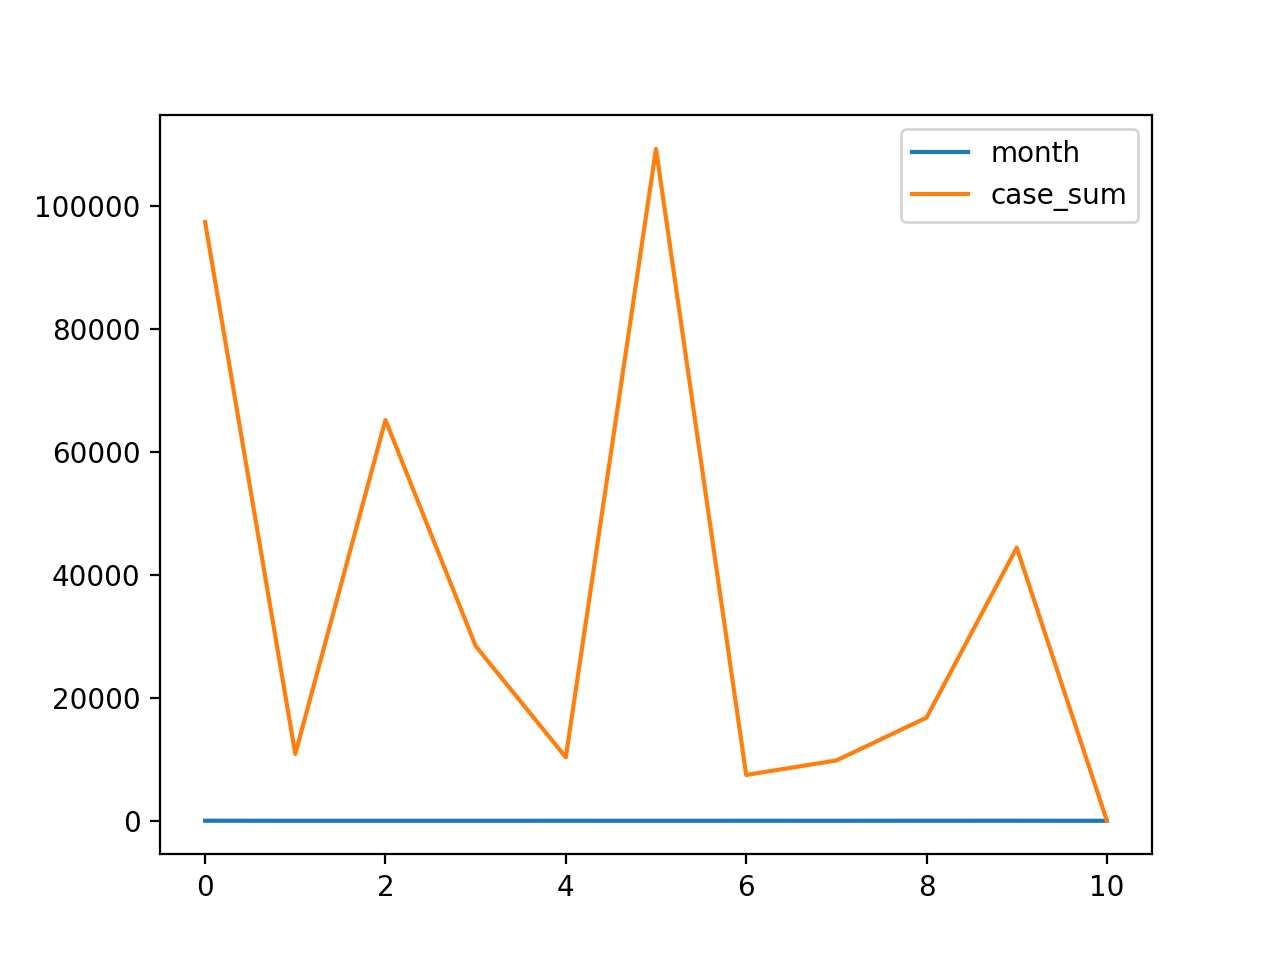

<AxesSubplot:>

In [10]:
p.plot()

<IPython.core.display.Javascript object>


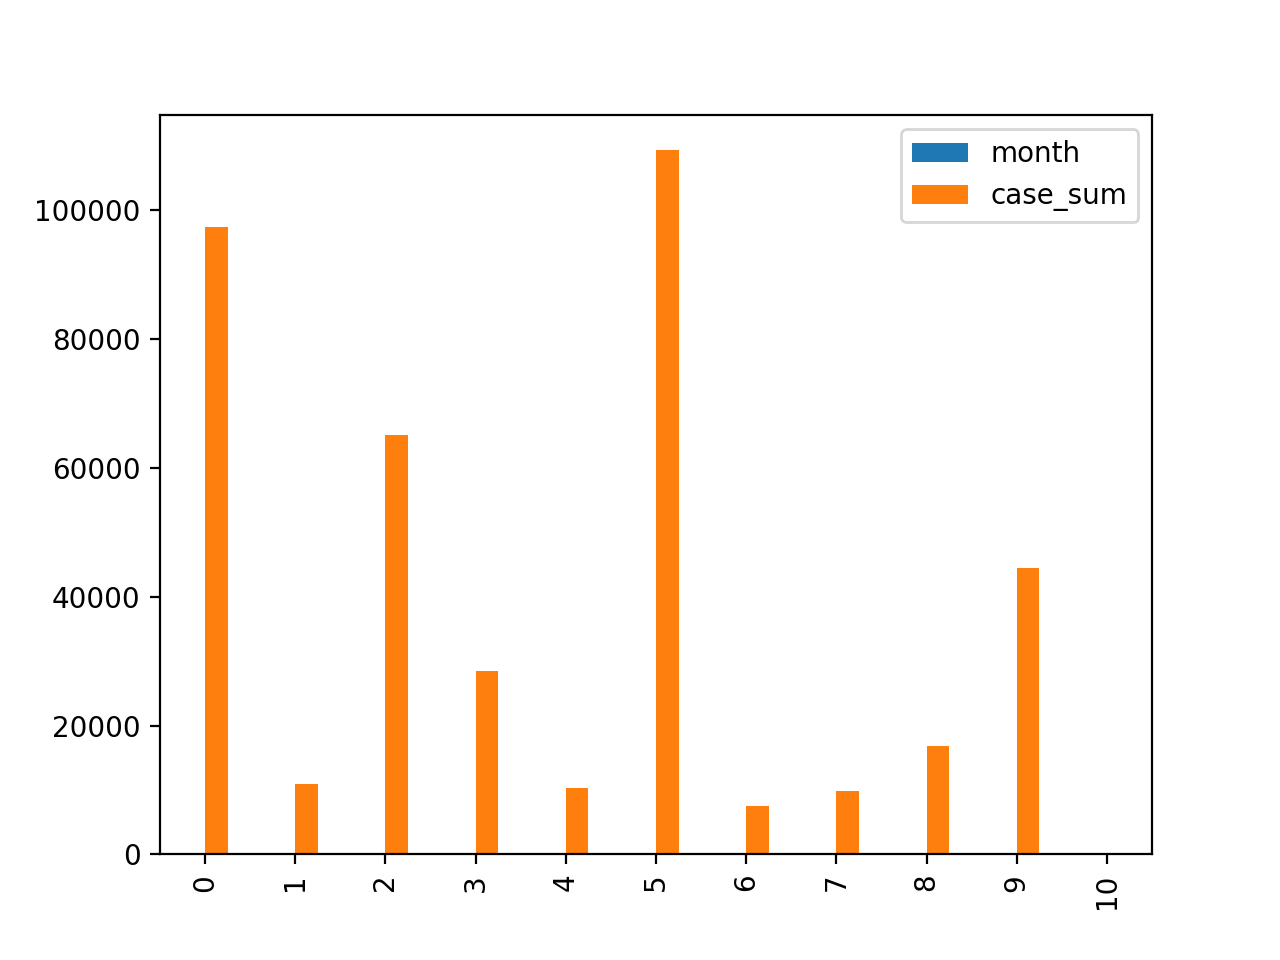

<AxesSubplot:>

In [11]:
p.plot(kind="bar")

In [12]:
p.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [13]:
p = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(CASE_COUNT) AS case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")

In [14]:
import calendar
p['Month'] = p['Month'].apply(lambda x: calendar.month_abbr[x])

TypeError: 'Column' object is not callable

In [15]:
import calendar
p['month'] = p['month'].apply(lambda x: calendar.month_abbr[x])

TypeError: 'Column' object is not callable

In [16]:
import calendar

In [17]:
p.show()

+-----+--------+
|month|case_sum|
+-----+--------+
|   12| 97381.0|
|    6| 10868.0|
|    3| 65190.0|
|    5| 28436.0|
|    9| 10325.0|
|    4|109303.0|
|    8|  7456.0|
|    7|  9813.0|
|   10| 16785.0|
|   11| 44426.0|
|    2|     1.0|
+-----+--------+



In [18]:
p['month'] = p['month'].apply(lambda x: calendar.month_abbr[x])

TypeError: 'Column' object is not callable

In [19]:
p = p.toPandas()

In [20]:
display(p)

,month,case_sum
0,12,97381.0
1,6,10868.0
2,3,65190.0
3,5,28436.0
4,9,10325.0
5,4,109303.0
6,8,7456.0
7,7,9813.0
8,10,16785.0
9,11,44426.0


<IPython.core.display.Javascript object>


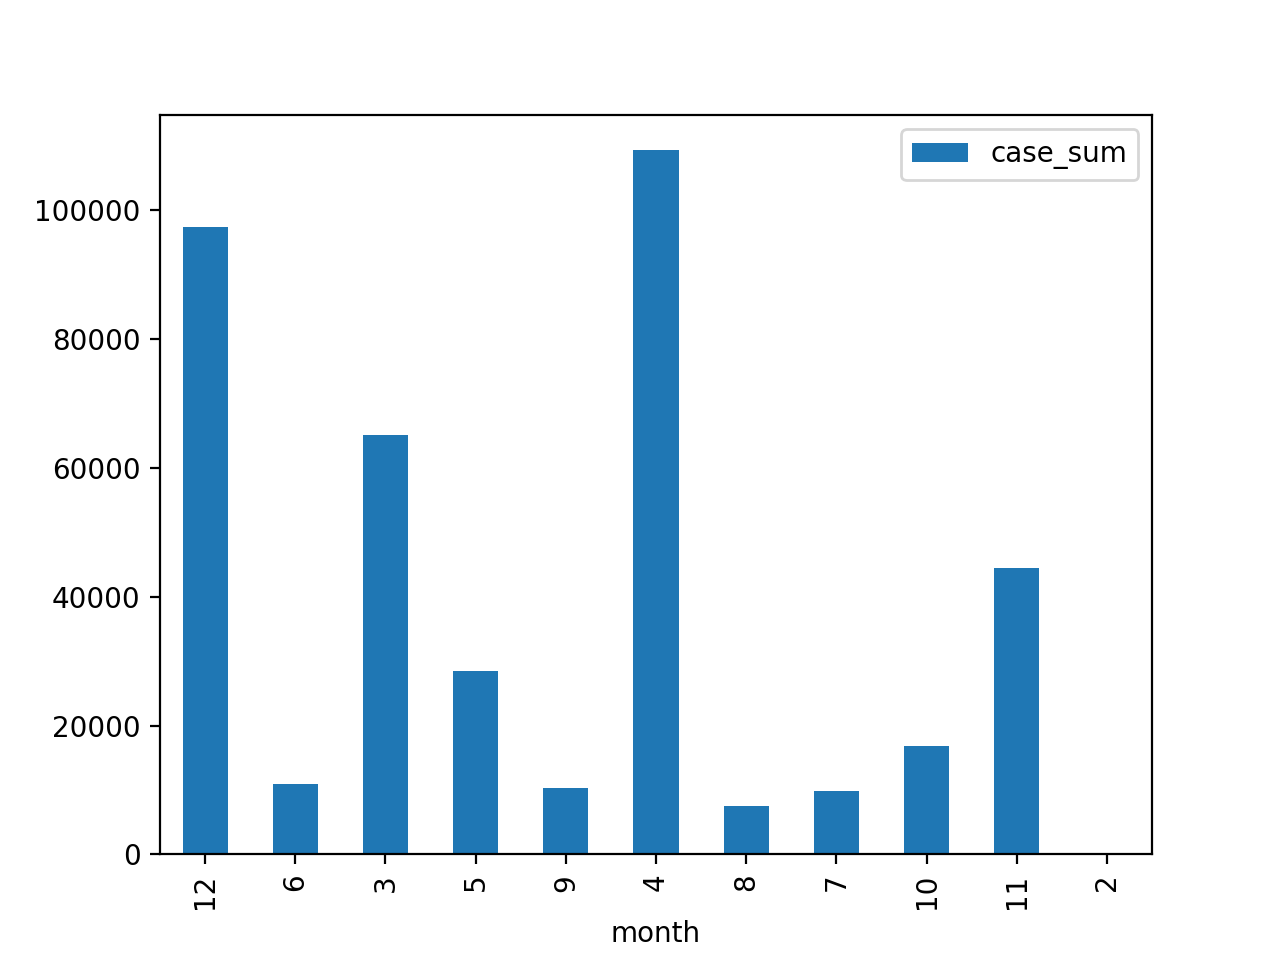

In [21]:
p.plot(kind='bar',x='month',y='case_sum')
plt.show()

In [22]:
p.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last', sort_remaining=True, by=None)

TypeError: sort_index() got an unexpected keyword argument 'by'

In [23]:
p.sort(columns=month, axis=1, ascending=True, inplace=False, kind='quicksort', na_position='last', **kwargs)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [24]:
display(p)

,month,case_sum
0,12,97381.0
1,6,10868.0
2,3,65190.0
3,5,28436.0
4,9,10325.0
5,4,109303.0
6,8,7456.0
7,7,9813.0
8,10,16785.0
9,11,44426.0


In [25]:
p.sort_values('month')

,month,case_sum
10,2,1.0
2,3,65190.0
5,4,109303.0
3,5,28436.0
1,6,10868.0
7,7,9813.0
6,8,7456.0
4,9,10325.0
8,10,16785.0
9,11,44426.0


<IPython.core.display.Javascript object>


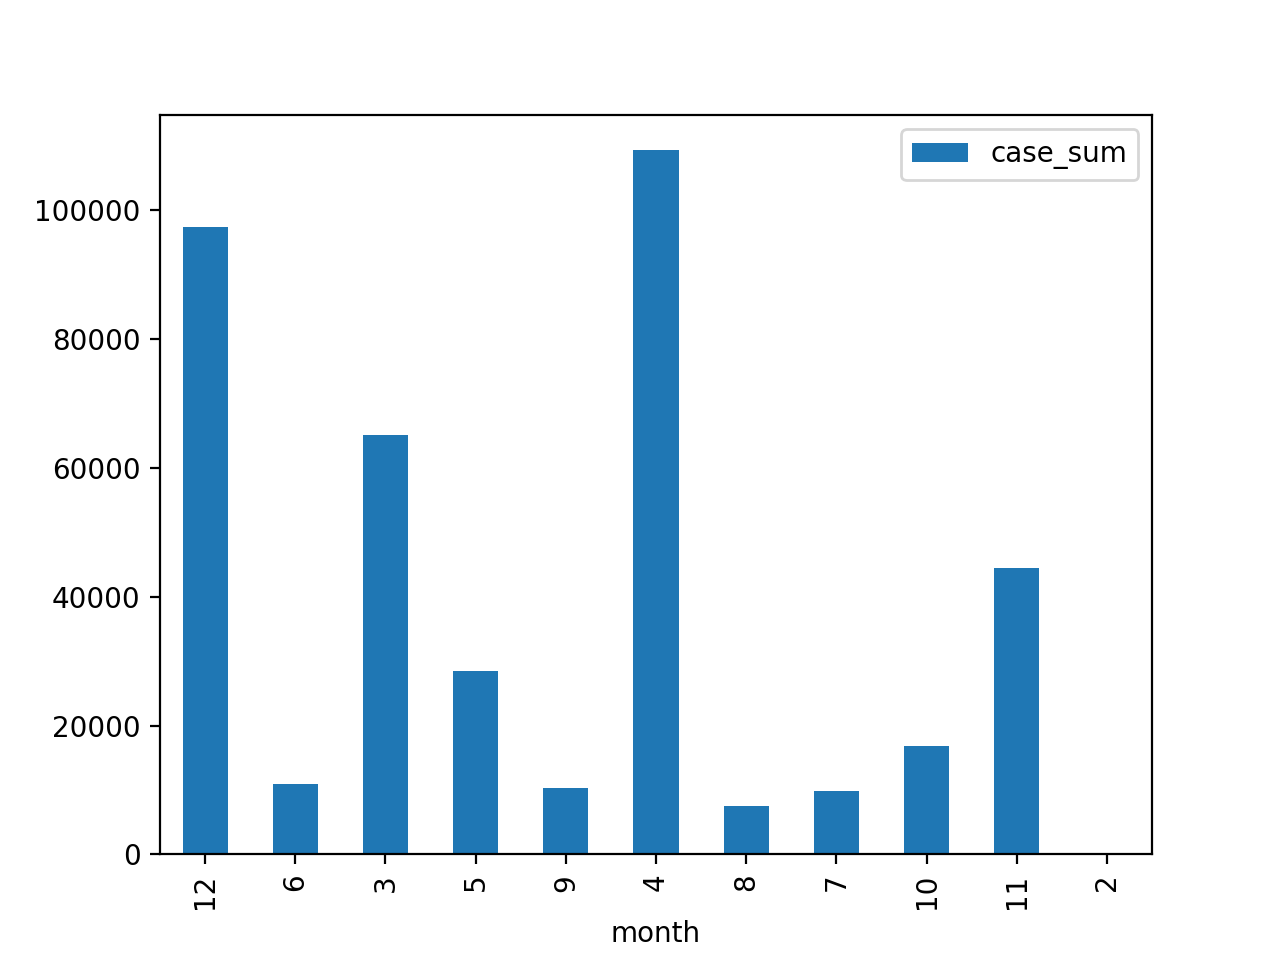

In [26]:
p.plot(kind='bar',x='month',y='case_sum')
plt.show()

In [27]:
p1 = p.sort_values('month')

In [28]:
display(p1)

,month,case_sum
10,2,1.0
2,3,65190.0
5,4,109303.0
3,5,28436.0
1,6,10868.0
7,7,9813.0
6,8,7456.0
4,9,10325.0
8,10,16785.0
9,11,44426.0


<IPython.core.display.Javascript object>


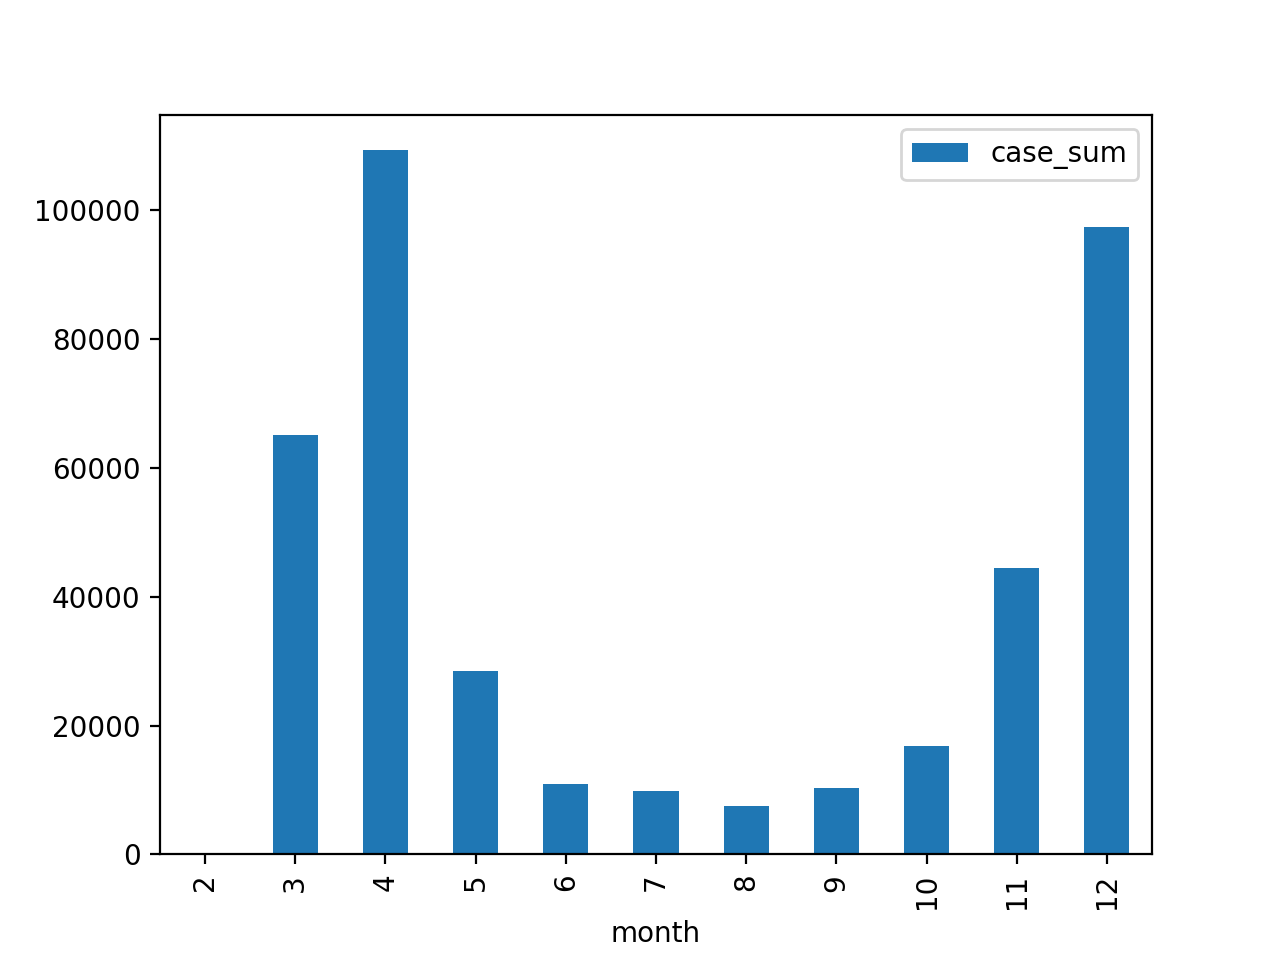

In [29]:
p1.plot(kind='bar',x='month',y='case_sum')
plt.show()

In [30]:
p1.set_title('Covid Cases in NYC in 2020')
p1.plot(kind='bar',x='month',y='case_sum')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'set_title'

In [31]:
p1.title('Covid Cases in NYC in 2020')
p1.plot(kind='bar',x='month',y='case_sum')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'title'

In [32]:
p1.plot(kind='bar',title='Covid Cases in NYC in 2020'x='month',y='case_sum')
plt.show()

SyntaxError: invalid syntax (<ipython-input-32-f0a4e315dccc>, line 1)

<IPython.core.display.Javascript object>


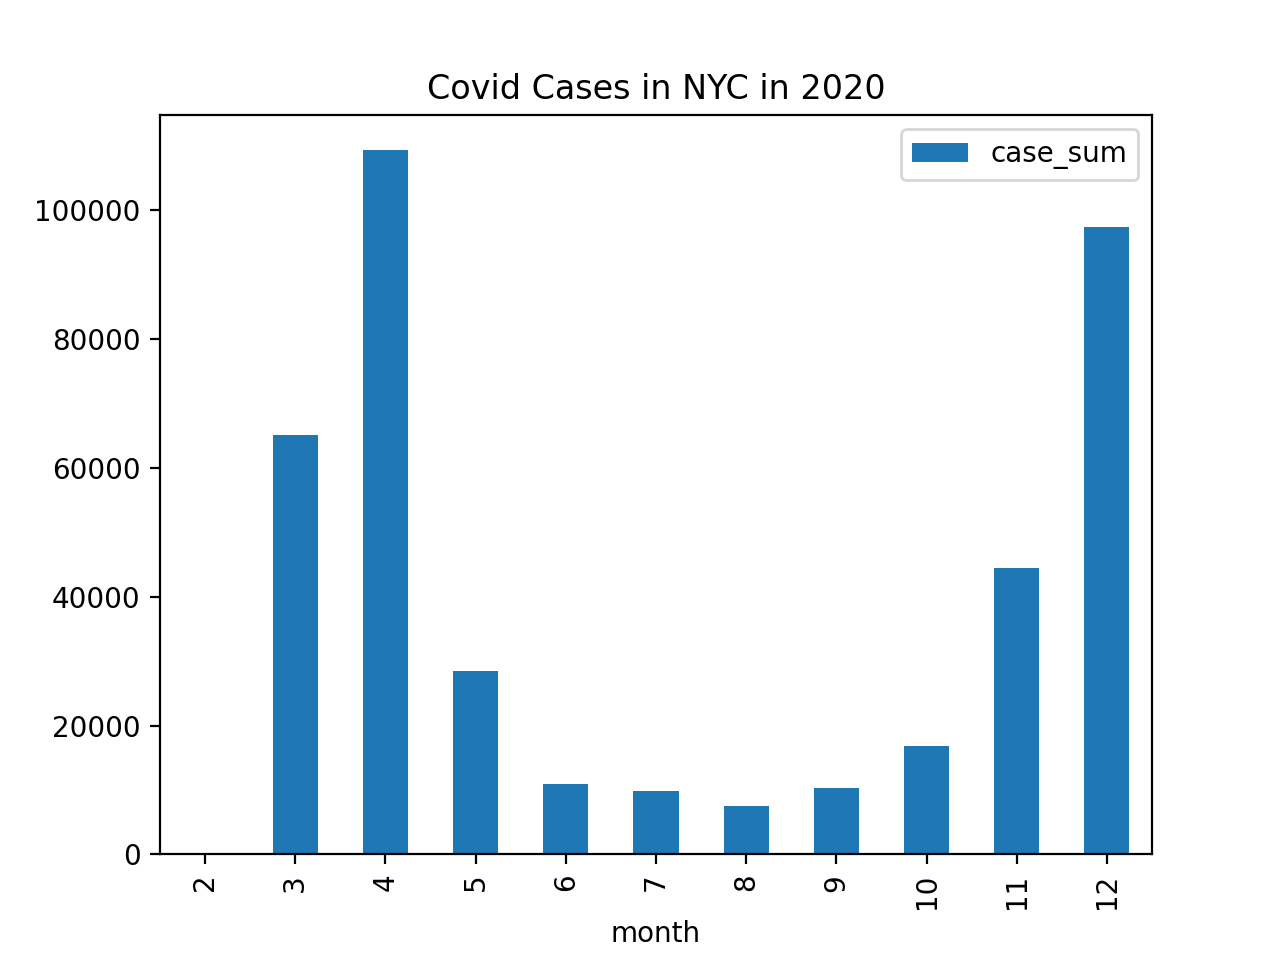

In [33]:
p1.plot(kind='bar',title='Covid Cases in NYC in 2020',x='month',y='case_sum')
plt.show()

In [34]:
bx = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(BX_CASE_COUNT) AS bx_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""").show()

+-----+-----------+
|month|bx_case_sum|
+-----+-----------+
|   12|    16782.0|
|    6|     2243.0|
|    3|    12680.0|
|    5|     6487.0|
|    9|     1477.0|
|    4|    26881.0|
|    8|     1622.0|
|    7|     2016.0|
|   10|     2547.0|
|   11|     7646.0|
|    2|        0.0|
+-----+-----------+



In [35]:
bx = bx.toPandas()

AttributeError: 'NoneType' object has no attribute 'toPandas'

In [36]:
bx.show()

AttributeError: 'NoneType' object has no attribute 'show'

In [37]:
bx = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(BX_CASE_COUNT) AS bx_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")

In [38]:
bx = bx.toPandas()

In [39]:
bx1 = bx.sort_values('month')

<IPython.core.display.Javascript object>


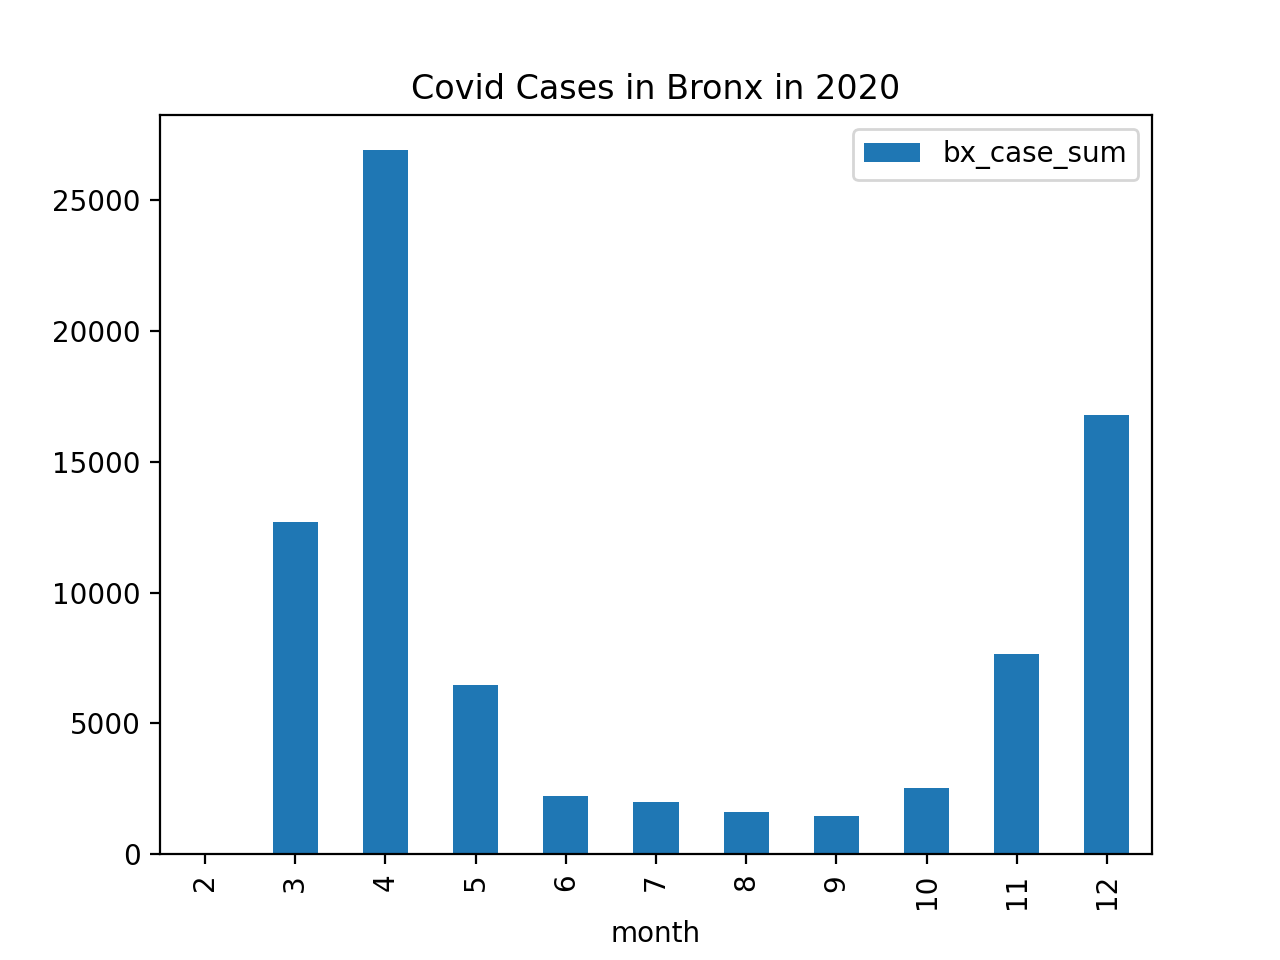

In [40]:
bx1.plot(kind='bar',title='Covid Cases in Bronx in 2020',x='month',y='bx_case_sum')
plt.show()

<IPython.core.display.Javascript object>


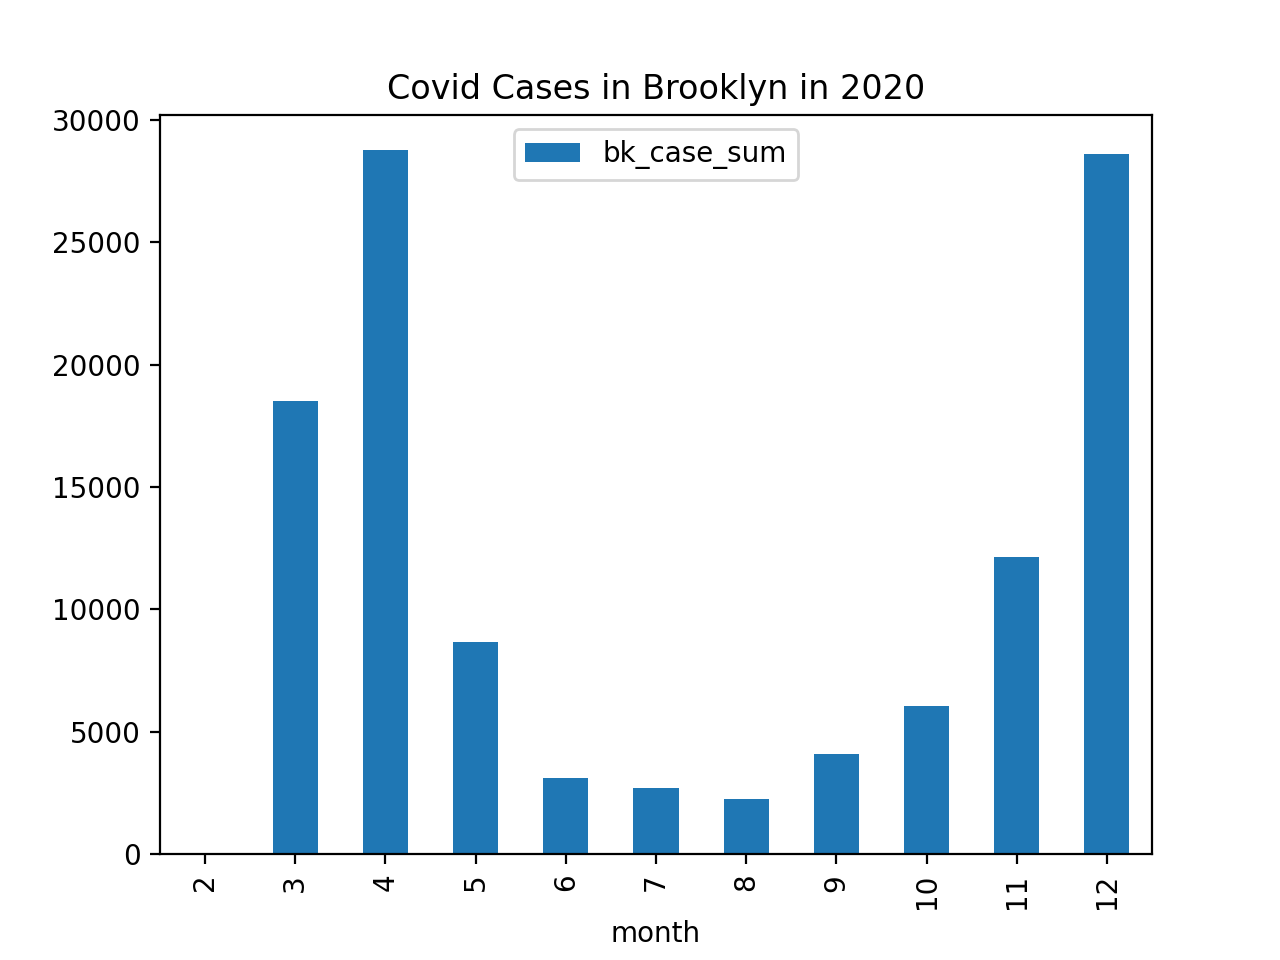

In [41]:
bk = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(BK_CASE_COUNT) AS bk_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
bk = bk.toPandas()
bk1 = bk.sort_values('month')
bk1.plot(kind='bar',title='Covid Cases in Brooklyn in 2020',x='month',y='bk_case_sum')
plt.show()

In [42]:
mn = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(BK_CASE_COUNT) AS mn_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
mn = mn.toPandas()
mn1 = mn.sort_values('month')
mn1.plot(kind='bar',title='Covid Cases in Brooklyn in 2020',x='month',y=‘mn_case_sum')
plt.show()

SyntaxError: invalid character '‘' (U+2018) (<ipython-input-42-d96962f166e0>, line 7)

In [43]:
mn = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(MN_CASE_COUNT) AS mn_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
mn = mn.toPandas()
mn1 = mn.sort_values('month')
mn1.plot(kind='bar',title='Covid Cases in Brooklyn in 2020',x='month',y=‘mn_case_sum')
plt.show()

SyntaxError: invalid character '‘' (U+2018) (<ipython-input-43-6d3fa2c469b3>, line 7)

<IPython.core.display.Javascript object>


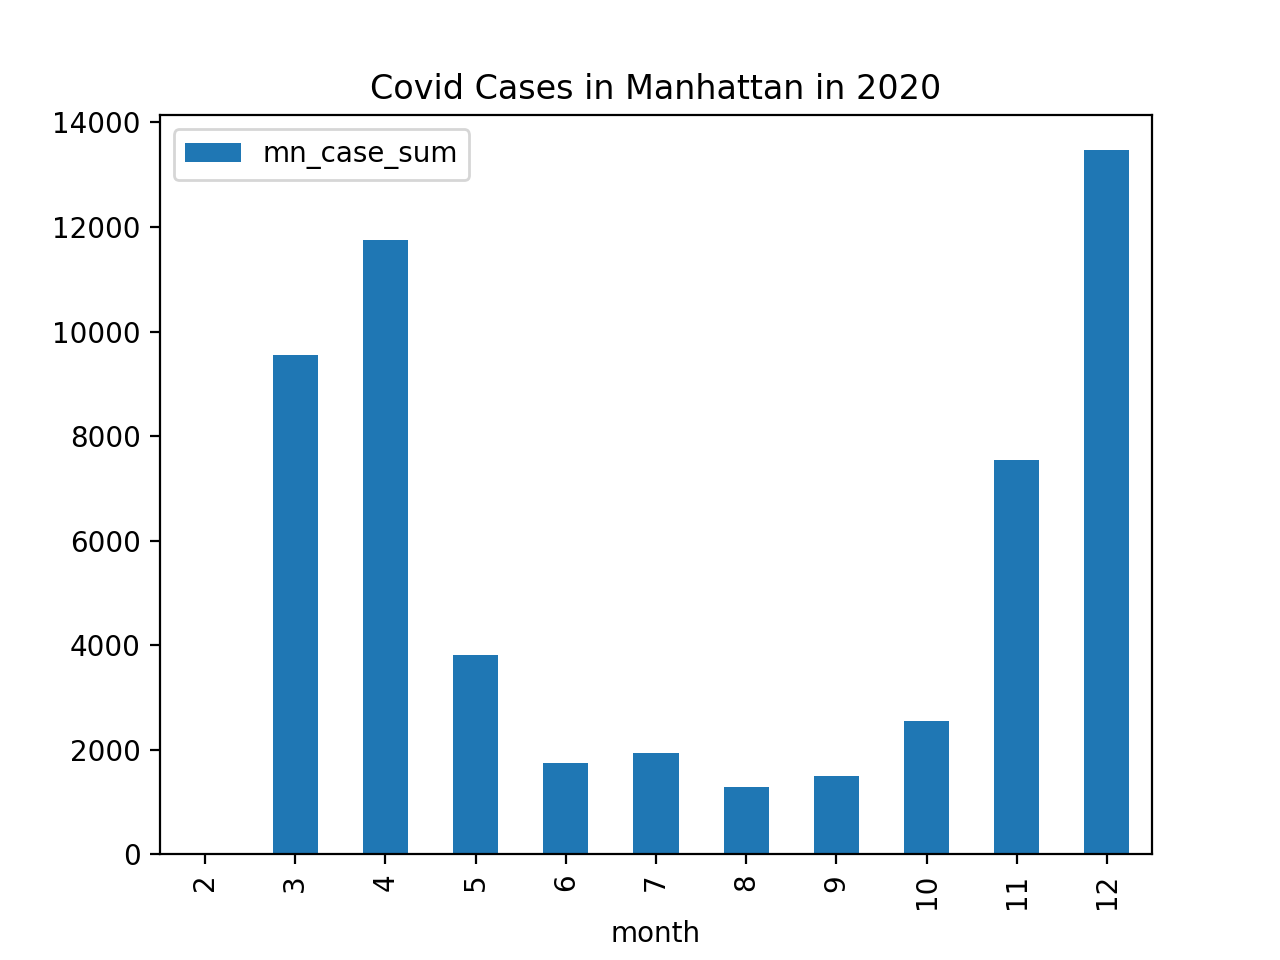

In [44]:
mn = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(MN_CASE_COUNT) AS mn_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
mn = mn.toPandas()
mn1 = mn.sort_values('month')
mn1.plot(kind='bar',title='Covid Cases in Manhattan in 2020',x='month',y= 'mn_case_sum')
plt.show()

<IPython.core.display.Javascript object>


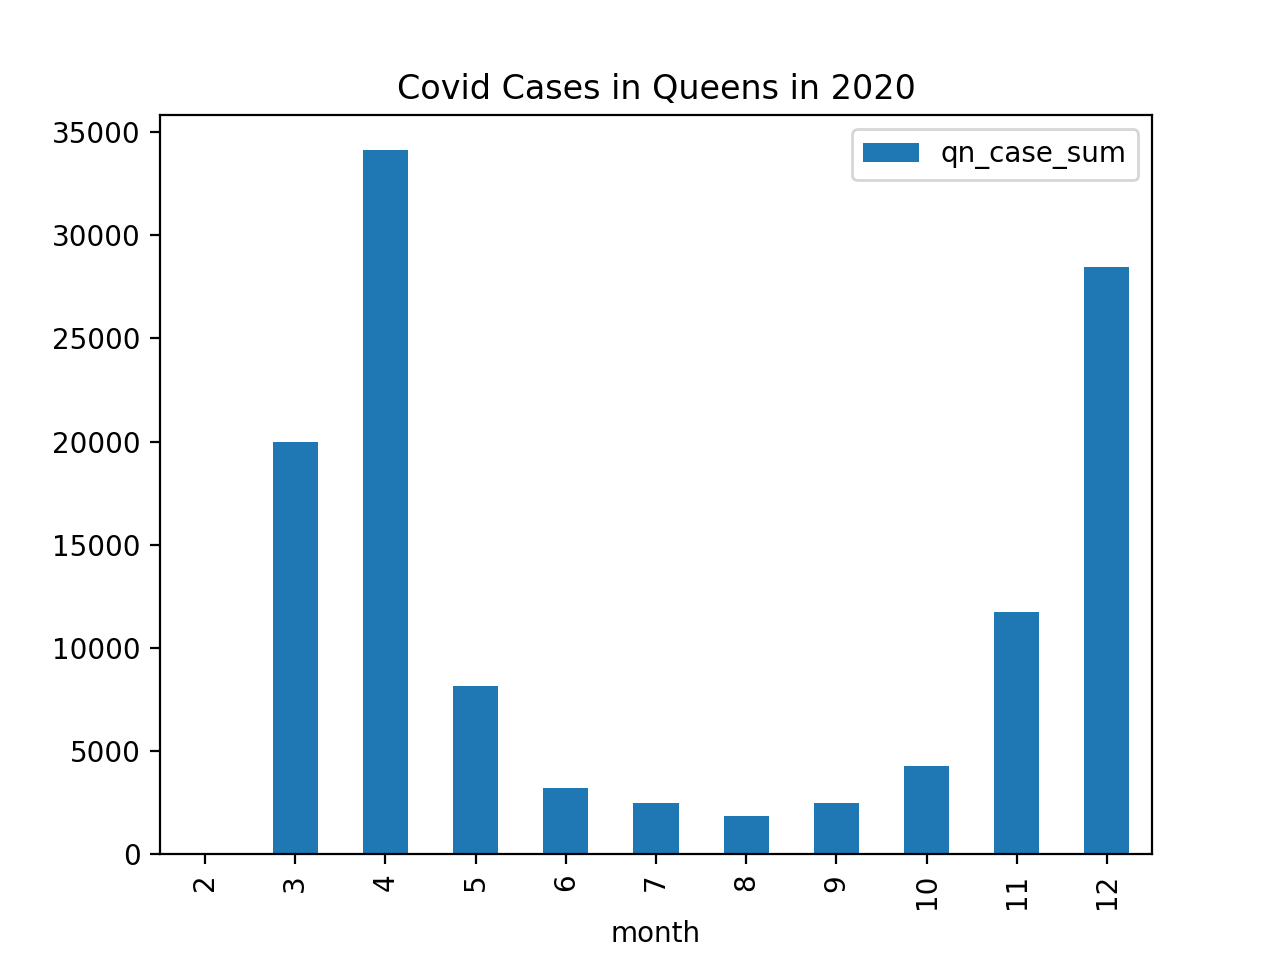

In [45]:
qn = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(QN_CASE_COUNT) AS qn_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
qn = qn.toPandas()
qn1 = qn.sort_values('month')
qn1.plot(kind='bar',title='Covid Cases in Queens in 2020',x='month',y= 'qn_case_sum')
plt.show()

In [46]:
si = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(SI_CASE_COUNT) AS si_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
si = si.toPandas()
si1 = si.sort_values('month')
qn1.plot(kind='bar',title='Covid Cases in Staten Island in 2020',x='month',y= ‘si_case_sum')
plt.show()

SyntaxError: invalid character '‘' (U+2018) (<ipython-input-46-dfba9ab5276f>, line 7)

In [47]:
si = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(SI_CASE_COUNT) AS si_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
si = si.toPandas()
si1 = si.sort_values('month')
qn1.plot(kind='bar',title='Covid Cases in Staten Island in 2020',x='month',y= 'si_case_sum')
plt.show()

KeyError: 'si_case_sum'

<IPython.core.display.Javascript object>


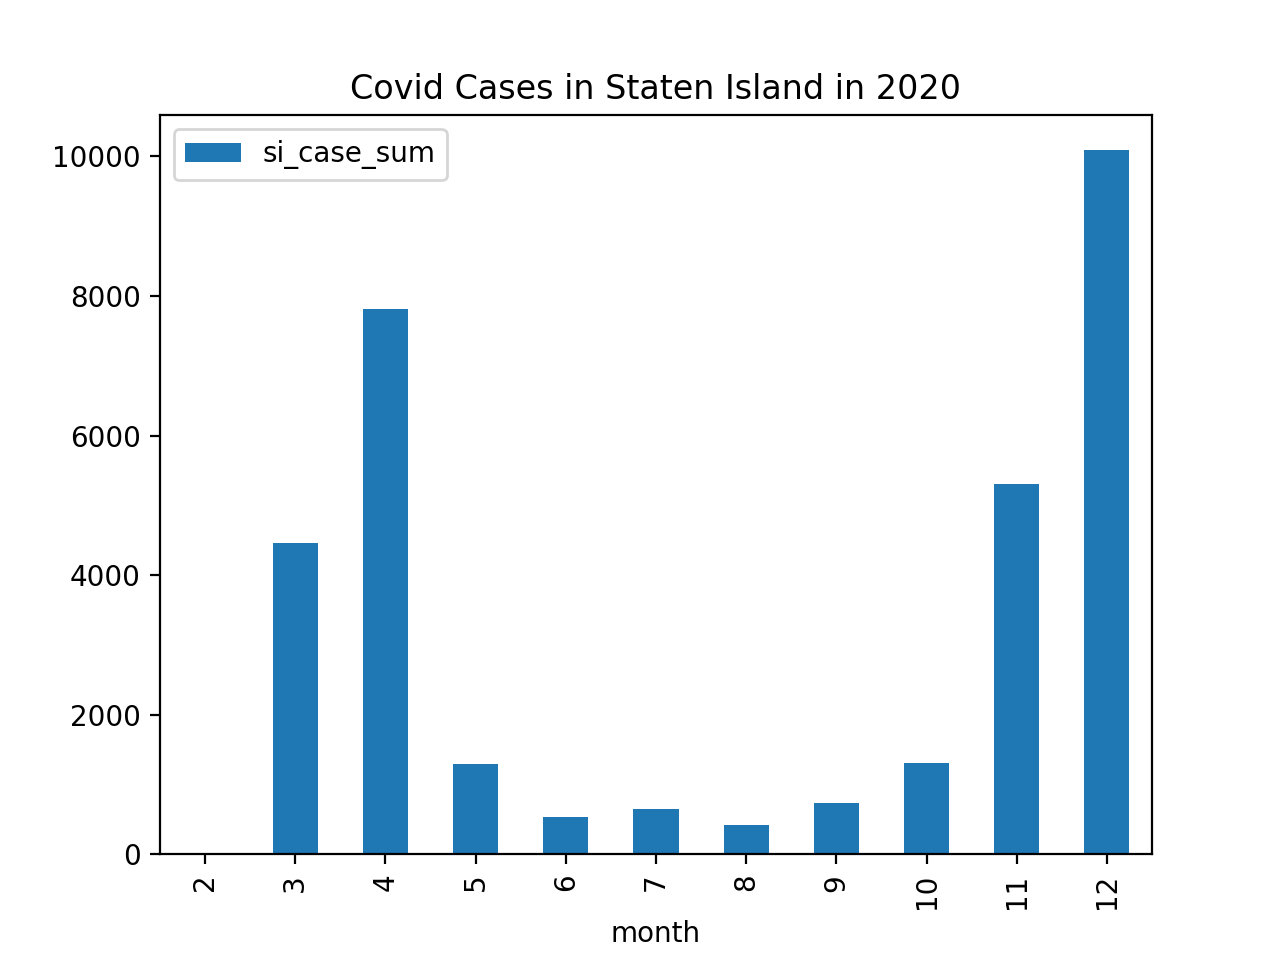

In [48]:
si = s.sql("""
    SELECT MONTH(date_of_interest) AS month, SUM(SI_CASE_COUNT) AS si_case_sum
    FROM data
    GROUP BY MONTH(date_of_interest)""")
si = si.toPandas()
si1 = si.sort_values('month')
si1.plot(kind='bar',title='Covid Cases in Staten Island in 2020',x='month',y= 'si_case_sum')
plt.show()